In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("../Dataset/Train.csv")

In [46]:
df.head()

review label
0  mature intelligent and highly charged melodram...   pos
1  http://video.google.com/videoplay?docid=211772...   pos
2  Title: Opera (1987) Director: Dario Argento Ca...   pos
3  I think a lot of people just wrote this off as...   pos
4  This is a story of two dogs and a cat looking ...   pos

In [47]:
df.shape

(40000, 2)

In [48]:
df.columns

Index(['review', 'label'], dtype='object')

In [49]:
WorkingData = df.copy()

In [50]:
WorkingData.isnull().sum()

review    0
label     0
dtype: int64

In [51]:
df['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

<AxesSubplot: title={'center': 'Count of number of labels'}>

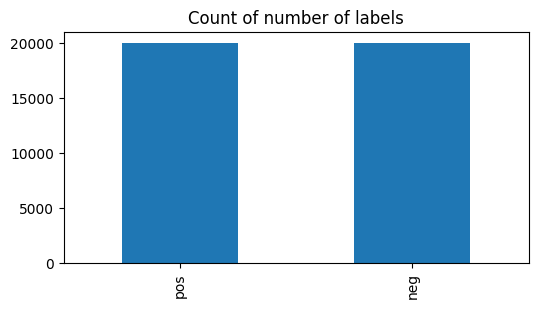

In [52]:
WorkingData['label'].value_counts().plot(kind='bar', title="Count of number of labels", figsize = (6,3))

### Label Encoding for Target Axis

In [53]:
from sklearn import preprocessing

In [54]:
label_encoder = preprocessing.LabelEncoder()

WorkingData['label'] = label_encoder.fit_transform(WorkingData['label'])

In [55]:
WorkingData['label'].unique()

array([1, 0])

In [56]:
df['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

In [57]:
WorkingData['label'].value_counts()

1    20011
0    19989
Name: label, dtype: int64

In [58]:
WorkingData.head()

review  label
0  mature intelligent and highly charged melodram...      1
1  http://video.google.com/videoplay?docid=211772...      1
2  Title: Opera (1987) Director: Dario Argento Ca...      1
3  I think a lot of people just wrote this off as...      1
4  This is a story of two dogs and a cat looking ...      1

In [59]:
y = WorkingData['label'].values

In [61]:
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

### Data Cleaning and Processing in Review Column

In [62]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

sw = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabbo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# Import the Porter stemming algorithm from the NLTK library
from nltk.stem.porter import PorterStemmer

# Create a new instance of the Porter stemming algorithm
ps = PorterStemmer()

In [64]:
WorkingData["review"][2000]

"I'm watching the series again now that it's out on DVD (yay!) It's striking me as fresh, as relevant and as intriguing as when it first aired.<br /><br />The central performances are gripping, the scripts are layered.<br /><br />I'll stick my neck out and put it up there with The Prisoner as a show that'll be winning new fans and still be watched come 2035.<br /><br />I've been asked to write some more line (it seems IMDb is as user unfriendly and anally retentively coded as ever! Pithy and to the point is clearly not the IMDb way.)<br /><br />Well, unlike IMDb's submissions editors, American Gothic understands that simplicity is everything.<br /><br />In 22 episodes, the show covers more character development than many shows do in seven seasons. On top of which it questions personal ethics and strength of character in a way which challenges the viewer at every turn to ask themselves what they would choose and what they would think in a given situation.<br /><br />When the show first 

In [65]:
# Import the Porter stemming algorithm from the NLTK library
from nltk.stem.porter import PorterStemmer

# Create a new instance of the Porter stemming algorithm
ps = PorterStemmer()

# Define a function to clean a sample of text
def clean_text(sample):
  # Convert the text to lowercase
  sample = sample.lower()

  # Remove non-alphabetic characters and replace with spaces
  sample = re.sub("[^a-zA-Z]+"," ", sample)

  # Split the text into individual words
  sample = sample.split()

  # Apply stemming to each word and remove stopwords
  sample = [ps.stem(s) for s in sample if s not in sw]

  # Join the stemmed words back into a single string
  sample = " ".join(sample)

  # Return the cleaned text sample
  return sample


In [66]:
clean_text(WorkingData["review"][10000]) # Example for the fucntion

'account event cover print sever time read two book voyag madmen strang last voyag donald crowhurst see film sheffield christma must say exceed expect tell sunday time golden globe yacht race men set someth never done support vessel wooden boat satellit phone gp wit skill get round globe one piec mention month solitud thunder southern ocean littl sleep boat often liter fall apart around br br documentari excel put togeth opinion tightli edit well pace superb narrat archiv footag interview fascin bring stori life clare crowhurst interview footag especi reveal move relat event led husband donald crowhurst departur teignmouth doubt fear mind reaction subsequ event unfold br br move even shed tear two time credit start roll overheard peopl express similar feel br br two book mention use detail back stori fit minut would recommend br br ultim true stori human courag human frailti must see anyon interest sail adventur human endeavour real life hero'

In [67]:
# Apply the fucntion to dataset text column
WorkingData['processed_review'] = WorkingData['review'].apply(clean_text)

In [68]:
WorkingData.head()

review  label  \
0  mature intelligent and highly charged melodram...      1   
1  http://video.google.com/videoplay?docid=211772...      1   
2  Title: Opera (1987) Director: Dario Argento Ca...      1   
3  I think a lot of people just wrote this off as...      1   
4  This is a story of two dogs and a cat looking ...      1   

                                    processed_review  
0  matur intellig highli charg melodrama unbelive...  
1  http video googl com videoplay docid hl en dis...  
2  titl opera director dario argento cast cristin...  
3  think lot peopl wrote anoth one tom cruis weir...  
4  stori two dog cat look way back home old wise ...

In [69]:
# Extract the 'processed_text' column from the WorkingData_2 DataFrame
processed_review = WorkingData['processed_review']

# Convert the processed text column to a NumPy array
corpus = processed_review.values

In [70]:
corpus

array(['matur intellig highli charg melodrama unbelivebl film china wei wei stun perform catylast love triangl simpli stun oppurun see magnific film take',
       'http video googl com videoplay docid hl en distribut tri br br opt mass appeal br br want best possibl view rang forgo profit continu manual labor job gladli entertain work br br view texa tale pleas write like like alex like stuie texa texa tale write br br opinion rule',
       'titl opera director dario argento cast cristina masillach ian charleson urbano barberini daria nicolodi review argento movi seen suspiria one blew away style color spooki stori line next decid go opera told one best man think discov ultim one favorit horror director br br opera young opera singer get big break main star creepi modern opera take mc beth get hit car betti understudi get part bad psycho make watch brutal murder friend co worker br br wow id heard good thing flick prepar level great film would take yeah movi shortcom ill get later part

### Data Transformation

In [80]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [81]:
cv = CountVectorizer(max_df = 0.5, max_features=50000)

In [82]:
X = cv.fit_transform(corpus).toarray()

In [83]:
X.shape

(40000, 50000)

In [84]:
X[:50]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [85]:
y[:50]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1])

### Dividing Dataset into Training and Test

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Traditional Machine Learning Models

In [89]:
# Import the confusion_matrix and classification_report functions from the sklearn.metrics module
from sklearn.metrics import confusion_matrix, classification_report

# Import the accuracy_score function from the sklearn.metrics module
from sklearn.metrics import accuracy_score

### Naive Bayes Classifier

In [90]:
# Import the GaussianNB classifier from the sklearn.naive_bayes module
from sklearn.naive_bayes import GaussianNB

# Create an instance of the GaussianNB classifier
classifier = GaussianNB()

# Train the classifier on the training data
# X_train is the input data for training, y_train is the target variable for training
classifier.fit(X_train, y_train)

GaussianNB()

In [91]:
# Make predictions on the test data using the trained classifier
y_pred = classifier.predict(X_test)

# Import the confusion_matrix and accuracy_score functions from the sklearn.metrics module
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute the confusion matrix for the predictions
# y_test is the actual target variable values for the test data, y_pred are the predicted values
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Compute the accuracy score for the predictions
# y_test is the actual target variable values for the test data, y_pred are the predicted values
accuracy_score(y_test, y_pred)

[[3307  598]
 [2317 1778]]


0.635625

In [92]:
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[3307  598]
 [2317 1778]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.85      0.69      3905
           1       0.75      0.43      0.55      4095

    accuracy                           0.64      8000
   macro avg       0.67      0.64      0.62      8000
weighted avg       0.67      0.64      0.62      8000



### K-NN

In [96]:
# Import the KNeighborsClassifier class from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Set the number of neighbors to consider (k) to 3
k = 5

# Create a KNeighborsClassifier object with the specified number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

In [97]:
# Train the K-Nearest Neighbors classifier using the training data
knn.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = knn.predict(X_test)

# Compute the accuracy of the K-Nearest Neighbors classifier on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

MemoryError: Unable to allocate 11.9 GiB for an array with shape (32000, 50000) and data type float64

In [ ]:
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

### Random Forest Classifier

In [98]:
# Import the RandomForestClassifier class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier class with the following parameters
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the RandomForestClassifier to the training data
rfc.fit(X_train, y_train)

# Predict class labels for the test data
y_pred = rfc.predict(X_test)

In [ ]:
# Calculate the accuracy of the predicted labels
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

In [ ]:
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

### SVM

In [ ]:
from sklearn.svm import SVC
# Initialize a linear SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)

In [ ]:
svm.fit(X_train, y_train) # Train the SVM model on the training data X_train and corresponding target values y_train
y_pred = svm.predict(X_test) # Use the trained SVM model to make predictions on the test data X_test and store the predictions in y_pred variable


In [ ]:
# compute the accuracy of the SVM model predictions on the test data
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print("Accuracy:", accuracy)

In [ ]:
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

### Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression Classifier object
lr = LogisticRegression(solver='liblinear', multi_class='auto', random_state=42)

In [ ]:
# create a new instance of the logistic regression classifier
lr = LogisticRegression()

# train the logistic regression model on the training data X_train and corresponding target values y_train
lr.fit(X_train, y_train)

# use the trained logistic regression model to make predictions on the test data X_test
y_pred = lr.predict(X_test)

# compute the accuracy of the logistic regression model predictions on the test data
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print("Accuracy:", accuracy)

In [ ]:
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))